In [1]:
# Jupyter Notebook: Benchmark Matrix EDA & Clustering

# Cell 1: Imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")



In [2]:
# Cell 2: Load data
summary_path = "summary_statistics.csv"  # adjust path as needed
df = pd.read_csv(summary_path)
df.head()

,file,variables,constraints,nonzeros,density,sparsity_%,row_nnz_variance,col_nnz_variance,min_coefficient,max_coefficient,mean_coefficient,std_coefficient,integer_like_%,matrix_rank,avg_row_L2_norm,max_row_L2_norm,zero_rows,zero_columns
0,50v-10,2013,233,2745,0.005853,99.414748,5.922047,0.595041,-216.0,1.0,-43.466667,62.082597,100.000000,232,231.340446,293.513202,0,0
1,air05,7195,426,52121,0.017005,98.299517,7091.870622,3.601867,1.0,1.0,1.000000,0.000000,100.000000,367,10.359497,20.099751,0,0
2,app1-1,2480,4926,18275,0.001496,99.850407,12.640369,3104.559439,-1.0,1.0,0.096302,0.772661,60.355677,2480,1.423756,7.000000,0,0
3,assign1-5-8,156,161,3720,0.148113,85.188724,63.771459,71.681460,-5.0,1.0,-1.962366,1.345515,100.000000,156,10.668728,14.628739,0,0
4,b1c1s1,3872,3904,11408,0.000755,99.924532,12.391477,3.745048,-480.0,50.0,-41.872931,137.725341,96.633941,3584,128.017207,480.001042,0,0


In [3]:
# Cell 3: Basic info
print("\n🔍 Dataset Info:")
df.info()
print("\n📊 Descriptive Statistics:")
print(df.describe())



🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   file              94 non-null     object 
 1   variables         94 non-null     int64  
 2   constraints       94 non-null     int64  
 3   nonzeros          94 non-null     int64  
 4   density           94 non-null     float64
 5   sparsity_%        94 non-null     float64
 6   row_nnz_variance  94 non-null     float64
 7   col_nnz_variance  94 non-null     float64
 8   min_coefficient   94 non-null     float64
 9   max_coefficient   94 non-null     float64
 10  mean_coefficient  94 non-null     float64
 11  std_coefficient   94 non-null     float64
 12  integer_like_%    94 non-null     float64
 13  matrix_rank       94 non-null     int64  
 14  avg_row_L2_norm   94 non-null     float64
 15  max_row_L2_norm   94 non-null     float64
 16  zero_rows         94 non-null

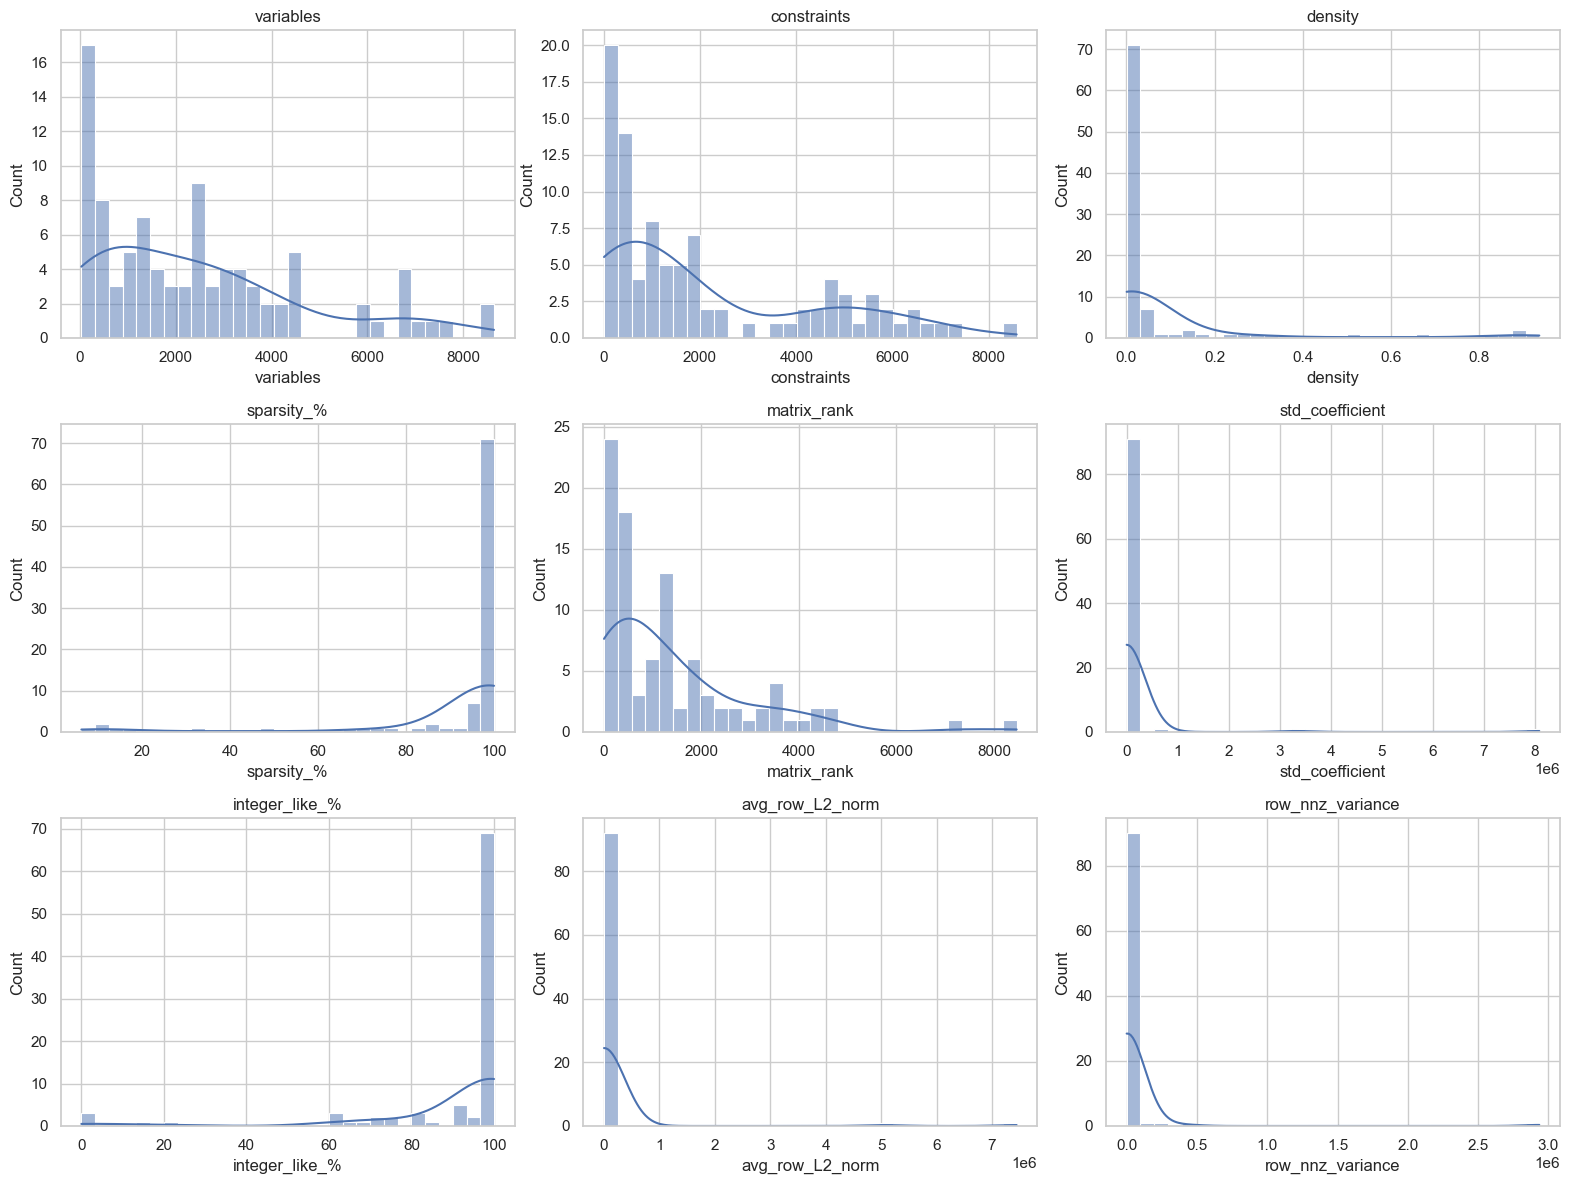

In [4]:
# Cell 4: Histograms of key metrics
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
cols = ["variables", "constraints", "density", "sparsity_%", "matrix_rank",
        "std_coefficient", "integer_like_%", "avg_row_L2_norm", "row_nnz_variance"]
for ax, col in zip(axes.flatten(), cols):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()


C:\Users\Sonali Prajapati\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


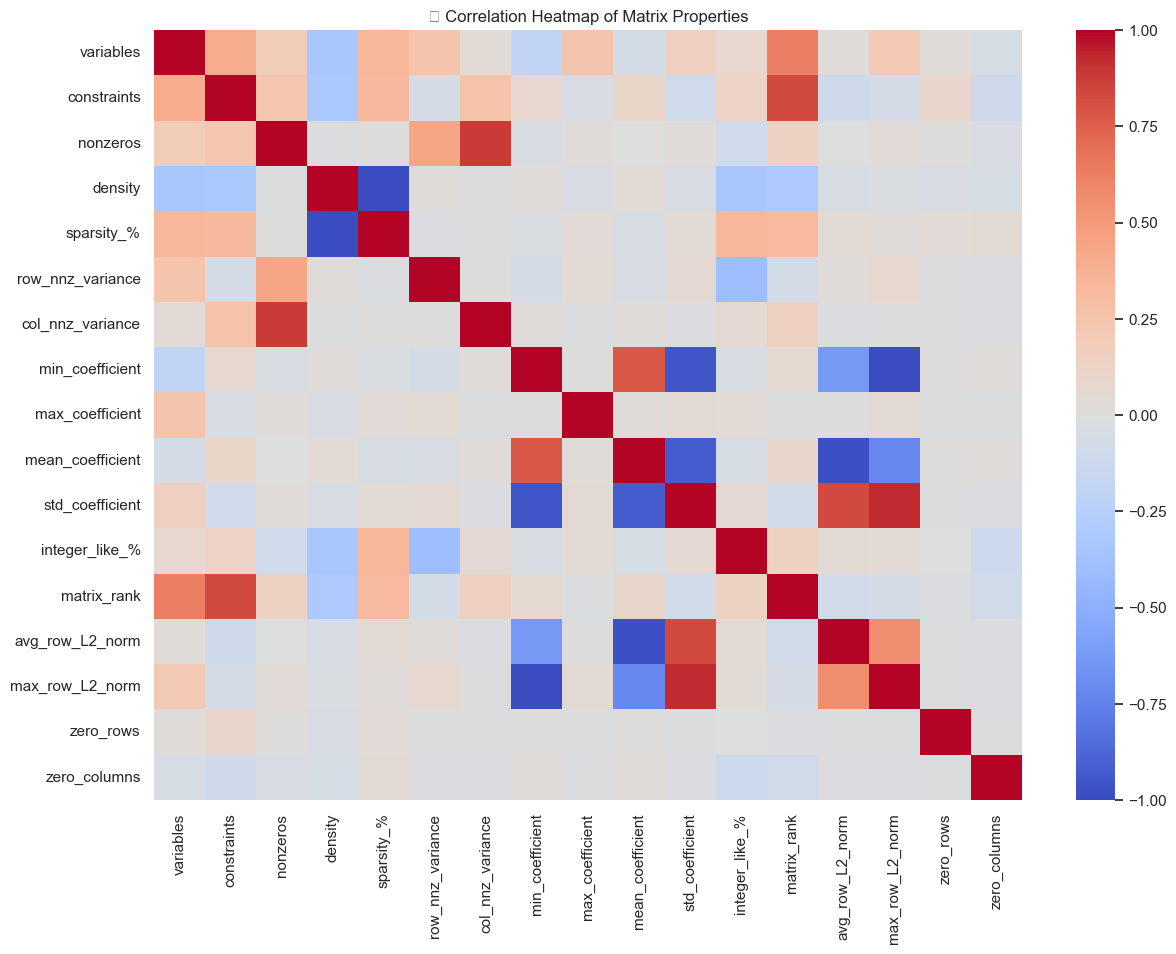

In [5]:
# Cell 5: Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(columns=["file"]).corr(), cmap="coolwarm", annot=False)
plt.title("🔗 Correlation Heatmap of Matrix Properties")
plt.show()


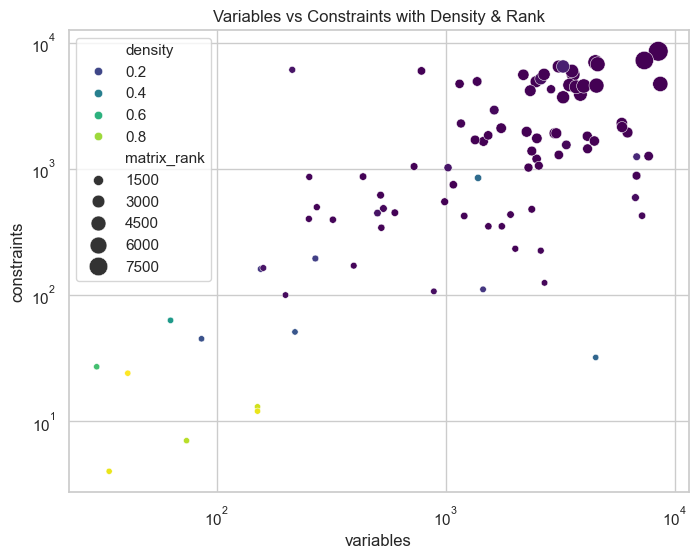

In [6]:
# Cell 6: Scatter plot - Variables vs Constraints
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="variables", y="constraints", size="matrix_rank", hue="density", palette="viridis", sizes=(20, 200))
plt.title("Variables vs Constraints with Density & Rank")
plt.xscale("log")
plt.yscale("log")
plt.show()


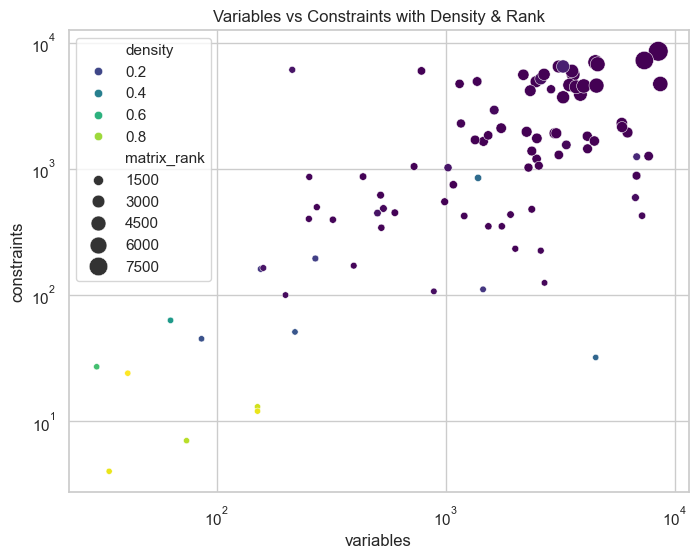

In [7]:
# Cell 6: Scatter plot - Variables vs Constraints
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="variables", y="constraints", size="matrix_rank", hue="density", palette="viridis", sizes=(20, 200))
plt.title("Variables vs Constraints with Density & Rank")
plt.xscale("log")
plt.yscale("log")
plt.show()


In [8]:
# Cell 7: Feature selection and scaling
features = df.drop(columns=["file"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


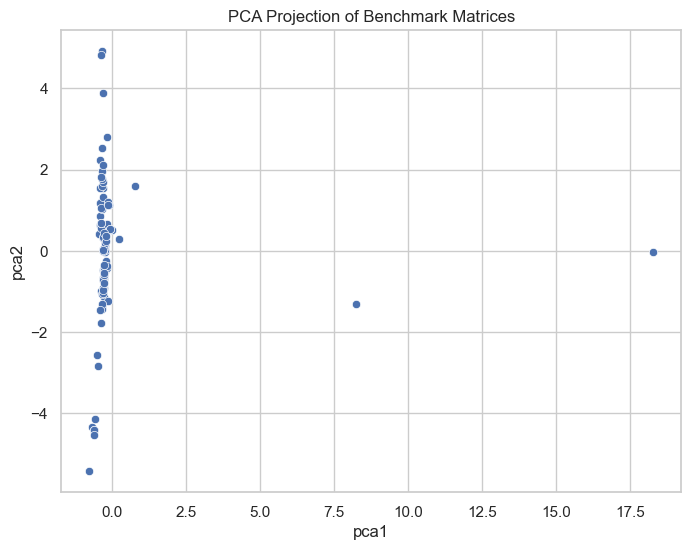

In [10]:
# Cell 8: PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca1", y="pca2", data=df)
plt.title("PCA Projection of Benchmark Matrices")
plt.show()



C:\Users\Sonali Prajapati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


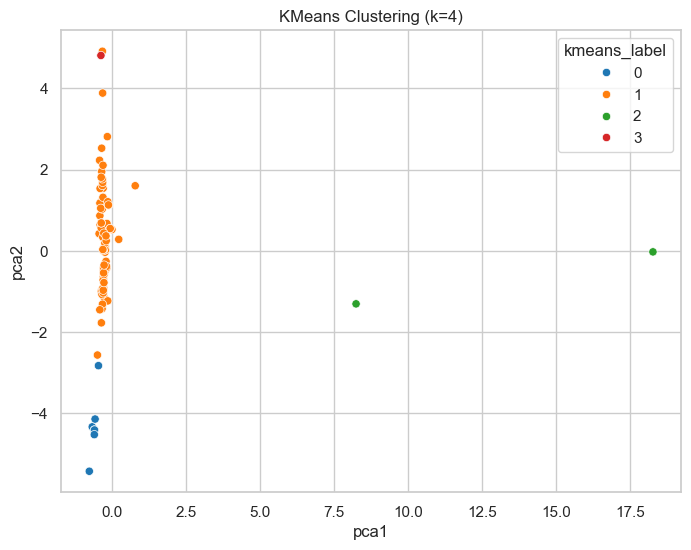

In [12]:
# Cell 9: KMeans clustering with k=4 (try different values too)
kmeans = KMeans(n_clusters=4, random_state=42)
df["kmeans_label"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="kmeans_label", palette="tab10")
plt.title("KMeans Clustering (k=4)")
plt.show()


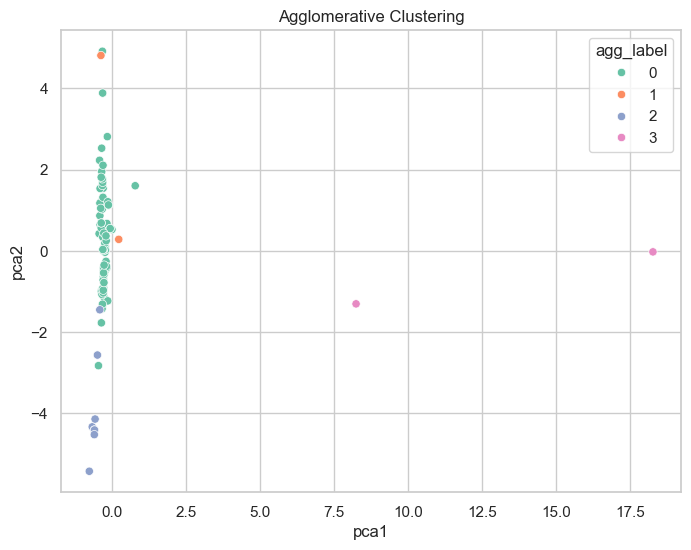

In [13]:
# Cell 10: Hierarchical clustering
agg = AgglomerativeClustering(n_clusters=4)
df["agg_label"] = agg.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="agg_label", palette="Set2")
plt.title("Agglomerative Clustering")
plt.show()


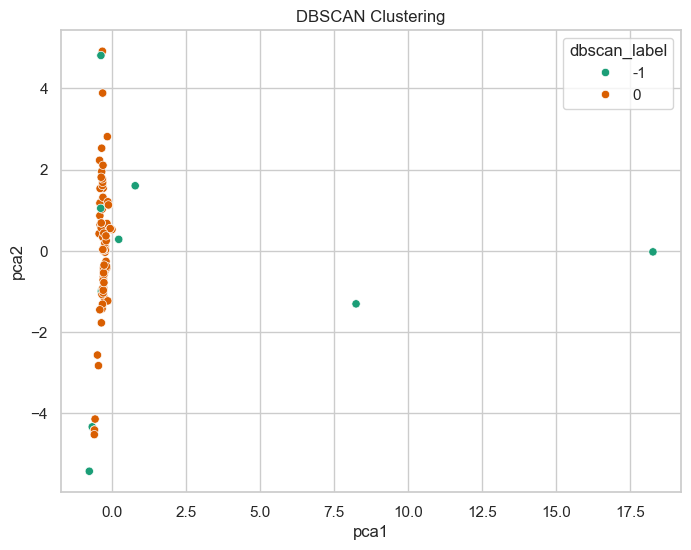

In [14]:
# Cell 11: DBSCAN clustering
db = DBSCAN(eps=2.5, min_samples=3)
df["dbscan_label"] = db.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="dbscan_label", palette="Dark2")
plt.title("DBSCAN Clustering")
plt.show()


In [17]:
# Cell 12: Cluster summary (KMeans example)
print("📌 Cluster Summary (KMeans):")
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(["kmeans_label"])
summary = df.groupby("kmeans_label")[numeric_cols].mean()
print(summary)


📌 Cluster Summary (KMeans):
              agg_label  avg_row_L2_norm  col_nnz_variance  constraints  \
kmeans_label                                                              
0              1.714286     1.566710e+04      7.221195e+00    21.428571   
1              0.059524     2.756375e+03      6.314471e+03  2279.904762   
2              3.000000     6.245465e+06      1.268918e+02   494.500000   
3              1.000000     1.739024e+02      1.374000e+06  6505.000000   

              dbscan_label   density  integer_like_%  matrix_rank  \
kmeans_label                                                        
0                -0.285714  0.802589       66.689497    21.428571   
1                -0.071429  0.028056       92.353642  1513.535714   
2                -1.000000  0.023554       98.677686   430.000000   
3                -1.000000  0.083221      100.000000  3253.000000   

              max_coefficient  max_row_L2_norm  ...  min_coefficient  \
kmeans_label                      

In [16]:
# Cell 13: Save clustered data
out_path = "clustered_summary.csv"
df.to_csv(out_path, index=False)
print(f"✅ Clustered data saved to: {out_path}")


✅ Clustered data saved to: clustered_summary.csv
